## Basit Lineer Regresyon Modeli


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.2f' % x)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score


In [5]:
df = pd.read_csv("datasets/advertising.csv")

In [6]:
df

,TV,radio,newspaper,sales
0,230.10,37.80,69.20,22.10
1,44.50,39.30,45.10,10.40
2,17.20,45.90,69.30,9.30
3,151.50,41.30,58.50,18.50
4,180.80,10.80,58.40,12.90
...,...,...,...,...
195,38.20,3.70,13.80,7.60
196,94.20,4.90,8.10,9.70
197,177.00,9.30,6.40,12.80
198,283.60,42.00,66.20,25.50


In [7]:
x = df[["TV"]]
y = df[["sales"]]
# bu iki değişken arasındaki doğrusal ilişkiyi modelleyeceğiz.

In [8]:
###############################33
# MODEL
#################################

In [9]:
reg_model = LinearRegression().fit(x,y)

In [13]:
# y_hat = b + w * TV
# sabit (b , bias)
reg_model.intercept_[0]

7.032593549127693

In [11]:
# tv'nin katsayısı(w1)
reg_model.coef_[0][0]

0.047536640433019764

In [14]:
############################
# TAHMİN
############################

In [15]:
# 150 br.lik TV harcaması olsa ne kadar satış olması beklenir?
reg_model.intercept_[0] + reg_model.coef_[0][0] * 150

14.163089614080658

In [16]:
# 500 brlik tv harcaması olsa satış ne kadar olur?
reg_model.intercept_[0] + reg_model.coef_[0][0] * 500

30.800913765637574

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.00,147.04,85.85,0.70,74.38,149.75,218.82,296.40
radio,200.00,23.26,14.85,0.00,9.97,22.90,36.52,49.60
newspaper,200.00,30.55,21.78,0.30,12.75,25.75,45.10,114.00
sales,200.00,14.02,5.22,1.60,10.38,12.90,17.40,27.00


Görüldüğü gibi tv nin max değeri 296. Ancak biz 500 değerini verdiğimizde elimideki veride olmayan bir değer için bile tahmin üretebiliyoruz artık.

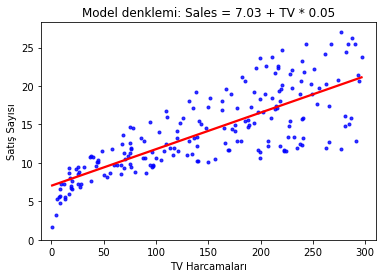

In [18]:
# Modelin Görselleştirilmesi
g = sns.regplot(x = x, y = y, scatter_kws = {"color": "b", "s": 9},
               ci = False, color = "r")
g.set_title(f"Model denklemi: Sales = {round(reg_model.intercept_[0],2)} + TV * {round(reg_model.coef_[0][0],2)}")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10, 310)
plt.ylim(bottom = 0)
plt.show()

In [19]:
###########################
# Tahmin Başarısı
###########################

In [24]:
#tahmin edilen y'ler
y_pred = reg_model.predict(x)
y_pred

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232],
       [ 9.76595037],
       [12.74649773],
       [ 7.44140866],
       [16.53041431],
       [10.17476548],
       [17.23871025],
       [ 8.16396559],
       [11.66741599],
       [16.73482186],
       [16.32125309],
       [10.25557777],
       [20.40940417],
       [10.32212907],
       [14.03474068],
       [17.41459582],
       [18.31779199],
       [ 7.6600772 ],
       [17.88520856],
       [ 9.99412625],
       [19.52997632],
       [13.82557947],
       [18.44614092],
       [18.85970969],
       [10.38868036],
       [20.95607553],
       [12.39948025],
       [11.653155  ],
       [19.65832525],
       [11.58185004],
       [20.85149492],
       [19.72012288],
       [10.58358059],
       [ 9.08142275],
       [17.87094757],
       [16.65876324],
       [15.44657891],
       [20.98935118],
       [16.86792445],
       [ 8.22576322],
       [15

In [31]:
# MSE
mean_squared_error(y, y_pred)

10.512652915656757

In [32]:
y.mean()

sales   14.02
dtype: float64

In [33]:
y.std()

sales   5.22
dtype: float64

In [34]:
# Değerler 9 ve 19 arasında değişiyor gibi görünüyor. 
# O halde hata payımızın 10 olması biraz yüksek bi değer

In [35]:
# RMSE
np.sqrt(mean_squared_error(y,y_pred))

3.2423221486546887

In [36]:
# MAE
mean_absolute_error(y, y_pred)

2.549806038927486

In [37]:
# R^2 = Bağımsız değişkenlerin bağımlı değişkeni açıklama yüzdesidir.
reg_model.score(x, y)

0.611875050850071

## Çoklu Lineer Regresyon Modeli

In [38]:
X = df.drop("sales", axis = 1)
y = df[["sales"]]

In [39]:
####################
# MODEL
####################

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)


X_test.shape


(40, 3)

In [45]:
y_train.shape

(160, 1)

In [46]:
#train setiyle model kurup test setiyle test edeceğiz.

In [47]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# ya da

# reg_model = LinearRegression().fit(X_train, y_train)

LinearRegression()

In [48]:
#sabit ( b, bias)
reg_model.intercept_

array([2.90794702])

In [49]:
# weightler
reg_model.coef_

array([[0.0468431 , 0.17854434, 0.00258619]])

In [59]:
# tv : 30, radio : 10 ,newspaper : 40



In [60]:
# sales = 2.90 + tv * 0.04 + radio * 0.17 + newspaper * 0.002

2.90 + 30 * 0.04 + 10 * 0.17 + 40 * 0.002

5.88

In [61]:
yeni_veri = [[30],[10],[40]]
yeni_veri = pd.DataFrame(yeni_veri).T
yeni_veri

,0,1,2
0,30,10,40


In [62]:
reg_model.predict(yeni_veri)

array([[6.202131]])

In [63]:
####################################
# Tahmin Başarısını Değerlendirme
####################################

In [66]:
# Train RMSE
y_pred = reg_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

1.7369025901470923

In [67]:
# TRAIN RKARE
reg_model.score(X_train, y_train)

0.8959372632325174

In [68]:
# Test RMSE 
y_pred = reg_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

1.4113417558581578

In [69]:
# TEST RKARE
reg_model.score(X_test, y_test)

0.8927605914615385

In [70]:
# 10 KATLI CROSS VALIDATION
np.mean(np.sqrt(-cross_val_score(reg_model,
                                 X,
                                 y,
                                 cv = 10,
                                 scoring = "neg_mean_squared_error")))


1.6913531708051792